Pandas Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Question 1: Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
batting = pd.read_csv('Batting.csv')

Question 2: Print out the dimensions and info about the dataframe you just created

In [3]:
batting.ndim

2

In [4]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [5]:
batting['SB'].fillna(0, inplace=True)
batting['IBB'].fillna(0, inplace=True)
batting['HBP'].fillna(0, inplace=True)
batting['SF'].fillna(0, inplace=True)

In [6]:
batting['SB']=batting['SB'].astype('int')
batting['IBB']=batting['IBB'].astype('int')
batting['HBP']=batting['HBP'].astype('int')
batting['SF']=batting['SF'].astype('int')

In [7]:
batting['teamID']=batting['teamID'].astype('category')
batting['lgID']=batting['lgID'].astype('category')

In [8]:
batting['PA']=batting['AB']+batting['BB']+batting['HBP']+batting['SF']
batting['OBP']=(batting['H']+batting['BB']+batting['HBP'])/batting['PA']
batting['BA']=batting['H']/batting['AB']

Question 3: How many players have hit 40 or more HRs in one single season? (Number only)

In [9]:
batting[batting['HR']>=40]['playerID'].nunique()

142

Question 4: How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [10]:
bat_gp=batting.groupby(['playerID','nameLast','nameFirst']).agg({'birthYear':'mean', 'AB':'sum','H':'sum', 'HR':'sum',
                                                             'SB':'sum','BB':'sum','HBP':'sum','SF':'sum','2B':'sum',
                                                             '3B':'sum','PA':'sum','OBP':'mean','BA':'mean',
                                                             'G':'sum'})
bat_gp[bat_gp['HR']>600]

,,,birthYear,AB,H,HR,SB,BB,HBP,SF,2B,3B,PA,OBP,BA,G
playerID,nameLast,nameFirst,,,,,,,,,,,,,,
aaronha01,Aaron,Hank,1934,12364,3771,755,240,1402,32,121,624,98,13919,0.371841,0.301075,3298
bondsba01,Bonds,Barry,1964,9847,2935,762,514,2558,106,91,601,77,12602,0.441545,0.298306,2986
griffke02,Griffey,Ken,1969,9801,2781,630,184,1312,81,102,524,38,11296,0.362241,0.274764,2671
mayswi01,Mays,Willie,1931,10881,3283,660,338,1464,44,91,523,140,12480,0.379872,0.289878,2992
rodrial01,Rodriguez,Alex,1975,10566,3115,696,329,1338,176,111,548,31,12191,0.363871,0.283283,2784
ruthba01,Ruth,Babe,1895,8398,2873,714,123,2062,43,0,506,136,10503,0.440905,0.322751,2503
sosasa01,Sosa,Sammy,1968,8813,2408,609,234,929,59,78,379,45,9879,0.332724,0.268151,2354
thomeji01,Thome,Jim,1970,8422,2328,612,19,1747,69,74,451,26,10312,0.380097,0.268027,2543


Question 5: How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [11]:
batting[(batting['2B']>=40) & (batting['3B']>=10) & (batting['H']>=200) & (batting['HR']>=30)]['playerID'].nunique()

11

Question 6: How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs)

In [12]:
batting[batting['SB']>=100].drop_duplicates('playerID')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
3473,brownpe01,Pete,Browning,1861,1887,1,LS2,AA,134,547,...,55,NaN,0,8,NaN,0,NaN,610,0.463934,0.402194
3501,comisch01,Charlie,Comiskey,1859,1887,1,SL4,AA,125,538,...,27,NaN,0,7,NaN,0,NaN,572,0.374126,0.334572
3546,fogarji01,Jim,Fogarty,1864,1887,1,PHI,NL,126,495,...,82,44.0,0,10,NaN,0,NaN,587,0.376491,0.260606
3617,lathaar01,Arlie,Latham,1860,1887,1,SL4,AA,136,627,...,45,NaN,0,5,NaN,0,NaN,677,0.366322,0.315789
3667,nicolhu01,Hugh,Nicol,1858,1887,1,CN2,AA,125,475,...,86,NaN,0,5,NaN,0,NaN,566,0.340989,0.214737
3764,wardjo01,John,Ward,1860,1887,1,NY1,NL,129,545,...,29,12.0,0,4,NaN,0,NaN,578,0.375433,0.337615
4278,hamilbi01,Billy,Hamilton,1866,1889,1,KC2,AA,137,534,...,87,41.0,0,14,NaN,0,NaN,635,0.412598,0.301498
5086,brownto01,Tom,Brown,1860,1891,1,BS2,AA,137,589,...,70,96.0,0,4,NaN,0,NaN,663,0.396682,0.320883
42681,willsma01,Maury,Wills,1932,1962,1,LAN,NL,165,695,...,51,57.0,1,2,7.0,4,7.0,752,0.347074,0.299281
51853,brocklo01,Lou,Brock,1939,1974,1,SLN,NL,153,635,...,61,88.0,16,2,2.0,1,8.0,699,0.367668,0.305512


Question 7: How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [13]:
bat_1960=batting[batting['yearID'].between(1960,1969)]
bat_1960_gp=bat_1960.groupby(["playerID","nameLast","nameFirst"]).sum()
bat_1960_gp[bat_1960_gp["HR"]>200]

,,,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
playerID,nameLast,nameFirst,,,,,,,,,,,,,,,,,,,,,
aaronha01,Aaron,Hank,19340,19645,10,1540,5912,1091,1819,309,45,375,...,672,723.0,160,12,1.0,64,146.0,6660,3.759823,3.077236
allisbo01,Allison,Bob,19340,19645,10,1333,4355,712,1110,192,44,225,...,719,916.0,29,31,20.0,33,90.0,5138,3.582196,2.505957
bankser01,Banks,Ernie,19310,19645,10,1495,5554,694,1460,243,40,269,...,410,756.0,127,46,31.0,61,145.0,6071,3.147647,2.620844
cashno01,Cash,Norm,19340,19645,10,1442,4819,779,1326,175,33,278,...,778,770.0,74,58,10.0,39,102.0,5694,3.777762,2.744244
cepedor01,Cepeda,Orlando,21307,21611,12,1400,5158,773,1522,268,18,254,...,391,767.0,105,81,2.0,50,133.0,5680,3.748209,3.129338
colavro01,Colavito,Rocky,21263,21611,13,1304,4634,677,1222,194,14,245,...,676,577.0,44,22,8.0,44,137.0,5376,3.792233,2.767220
howarfr01,Howard,Frank,19360,19645,10,1370,4776,654,1315,185,30,288,...,500,1103.0,74,28,7.0,31,138.0,5335,3.431109,2.752360
kalinal01,Kaline,Al,19340,19645,10,1322,4730,811,1399,247,31,210,...,652,489.0,65,25,20.0,46,122.0,5453,3.809484,2.947476
killeha01,Killebrew,Harmon,19360,19645,10,1429,4994,864,1331,183,17,393,...,970,1029.0,98,35,0.0,43,133.0,6042,3.844874,2.640849


Question 8: Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [14]:
bat_gp.nlargest(1,"HR")

,,,birthYear,AB,H,HR,SB,BB,HBP,SF,2B,3B,PA,OBP,BA,G
playerID,nameLast,nameFirst,,,,,,,,,,,,,,
bondsba01,Bonds,Barry,1964,9847,2935,762,514,2558,106,91,601,77,12602,0.441545,0.298306,2986


Question 9: Who had the most hits (H) in the 1970s? (Dataframe)

In [15]:
bat_1970=batting[batting['yearID'].between(1970,1979)]
bat_1970.groupby(["playerID","nameLast","nameFirst"]).sum().nlargest(1,"H")

,,,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
playerID,nameLast,nameFirst,,,,,,,,,,,,,,,,,,,,,
rosepe01,Rose,Pete,19410,19745,10,1604,6523,1068,2045,394,64,79,...,783,464.0,87,50,9.0,34,111.0,7390,3.892296,3.134102


Question 10: Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [16]:
batting[(batting['yearID']==1977) & (batting['PA']>=500)].nlargest(5,'OBP')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
54603,carewro01,Rod,Carew,1945,1977,1,MIN,AL,155,616,...,69,55.0,15,3,1.0,5,6.0,693,0.448773,0.387987
55273,singlke01,Ken,Singleton,1947,1977,1,BAL,AL,152,536,...,107,101.0,13,2,0.0,6,15.0,651,0.437788,0.328358
55280,smithre06,Reggie,Smith,1945,1977,1,LAN,NL,148,488,...,104,76.0,11,3,1.0,7,5.0,602,0.426910,0.307377
54820,hargrmi01,Mike,Hargrove,1949,1977,1,TEX,AL,153,525,...,103,59.0,7,6,8.0,6,13.0,640,0.420312,0.304762
55095,morgajo02,Joe,Morgan,1943,1977,1,CIN,NL,153,521,...,117,58.0,2,2,0.0,5,5.0,645,0.417054,0.287908


Question 11: Top 8 highest batting averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [17]:
batting[(batting['yearID']==2013) & (batting['PA']>=300)].nlargest(8,'BA')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
97188,cabremi01,Miguel,Cabrera,1983,2013,1,DET,AL,148,555,...,90,94.0,19,5,0.0,2,19.0,652,0.441718,0.347748
98062,ramirha01,Hanley,Ramirez,1983,2013,1,LAN,NL,86,304,...,27,52.0,3,3,0.0,2,5.0,336,0.401786,0.345395
97300,cuddymi01,Michael,Cuddyer,1979,2013,1,COL,NL,130,489,...,46,100.0,5,2,0.0,3,13.0,540,0.388889,0.331288
97825,mauerjo01,Joe,Mauer,1983,2013,1,MIN,AL,113,445,...,61,89.0,7,0,0.0,2,7.0,508,0.403543,0.323596
98293,troutmi01,Mike,Trout,1991,2013,1,LAA,AL,157,589,...,110,136.0,10,9,0.0,8,8.0,716,0.431564,0.322581
97651,johnsch05,Chris,Johnson,1984,2013,1,ATL,NL,142,514,...,29,116.0,5,2,0.0,2,20.0,547,0.358318,0.321012
97437,freemfr01,Freddie,Freeman,1989,2013,1,ATL,NL,147,551,...,66,121.0,10,7,0.0,5,10.0,629,0.395866,0.319419
98043,puigya01,Yasiel,Puig,1990,2013,1,LAN,NL,104,382,...,36,97.0,6,11,0.0,3,6.0,432,0.391204,0.319372


Question 12: Leaders in hits (top 5) from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

In [18]:
batting[batting['yearID'].between(1940,1949)].nlargest(5,"H")

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
33671,musiast01,Stan,Musial,1920,1948,1,SLN,NL,155,611,...,79,34.0,0,3,1.0,0,18.0,693,0.450216,0.376432
32499,musiast01,Stan,Musial,1920,1946,1,SLN,NL,156,624,...,73,31.0,0,3,2.0,0,7.0,700,0.434286,0.365385
31720,holmeto01,Tommy,Holmes,1917,1945,1,BSN,NL,154,636,...,70,9.0,0,4,3.0,0,11.0,710,0.419718,0.352201
30709,musiast01,Stan,Musial,1920,1943,1,SLN,NL,157,617,...,72,18.0,0,2,10.0,0,17.0,691,0.425470,0.356564
29747,travice01,Cecil,Travis,1913,1941,1,WS1,AL,152,608,...,52,25.0,0,1,2.0,0,13.0,661,0.409985,0.358553


Question 13: Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [19]:
bat_index=batting.groupby('yearID')["H"].nlargest(1).index.get_level_values(1)
bat_index=pd.Series(bat_index)
bat_maxH=batting.iloc[bat_index]
bat_maxH_MLB=bat_maxH[bat_maxH['lgID'].isin(['AL','NL'])]
bat_maxH_MLB['playerID'].value_counts().head(1)[0]

7

In [20]:
bat_maxH[bat_maxH['playerID']=='cobbty01']

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
10699,cobbty01,Ty,Cobb,1886,1907,1,DET,AL,150,605,...,24,NaN,0,5,12.0,0,NaN,634,0.380126,0.350413
11627,cobbty01,Ty,Cobb,1886,1909,1,DET,AL,156,573,...,48,NaN,0,6,24.0,0,NaN,627,0.430622,0.376963
12708,cobbty01,Ty,Cobb,1886,1911,1,DET,AL,146,591,...,44,NaN,0,8,11.0,0,NaN,643,0.466563,0.419628
13282,cobbty01,Ty,Cobb,1886,1912,1,DET,AL,140,553,...,43,NaN,0,5,8.0,0,NaN,601,0.455907,0.408680
15352,cobbty01,Ty,Cobb,1886,1915,1,DET,AL,156,563,...,118,43.0,0,10,9.0,0,NaN,691,0.486252,0.369449
16653,cobbty01,Ty,Cobb,1886,1917,1,DET,AL,152,588,...,61,34.0,0,4,16.0,0,NaN,653,0.444104,0.382653
17680,cobbty01,Ty,Cobb,1886,1919,1,DET,AL,124,497,...,38,22.0,0,1,9.0,0,NaN,536,0.429104,0.384306


Question 14: Which players have played the most games for their careers?  (Top 5 first name, last name, descending by games played presented as a dataframe)

In [21]:
bat_gp.sort_values('G', ascending=False).head()

,,,birthYear,AB,H,HR,SB,BB,HBP,SF,2B,3B,PA,OBP,BA,G
playerID,nameLast,nameFirst,,,,,,,,,,,,,,
rosepe01,Rose,Pete,1941,14053,4256,160,198,1566,107,79,746,135,15805,0.373604,0.300677,3562
yastrca01,Yastrzemski,Carl,1939,11988,3419,452,168,1845,40,105,646,59,13978,0.377292,0.283798,3308
aaronha01,Aaron,Hank,1934,12364,3771,755,240,1402,32,121,624,98,13919,0.371841,0.301075,3298
henderi01,Henderson,Rickey,1958,10961,3055,297,1406,2190,98,67,510,66,13316,0.395748,0.269085,3081
cobbty01,Cobb,Ty,1886,11434,4189,117,892,1249,94,0,724,295,12777,0.426992,0.361045,3035


Question 15: How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [22]:
((bat_gp['H']>3000) & (bat_gp['HR']>=500)).sum()

5

Question 16: How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [23]:
batting[batting['yearID']==1988]['HR'].sum()

3180

Question 17: Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [24]:
batting[(batting['nameLast']=="Boggs") & (batting['nameFirst']=="Wade") & (batting['AB']>=500)].nlargest(3,'BA')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
62316,boggswa01,Wade,Boggs,1958,1985,1,BOS,AL,161,653,...,96,61.0,5,4,3.0,2,20.0,755,0.450331,0.367534
65391,boggswa01,Wade,Boggs,1958,1988,1,BOS,AL,155,584,...,125,34.0,18,3,0.0,7,23.0,719,0.475661,0.366438
64335,boggswa01,Wade,Boggs,1958,1987,1,BOS,AL,147,551,...,105,48.0,19,2,1.0,8,13.0,666,0.460961,0.362976


Question 18: Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [25]:
batting[(batting['yearID']==1995) & (batting['PA']>=400)].nlargest(10,'OBP')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
73578,martied01,Edgar,Martinez,1963,1995,1,SEA,AL,145,511,...,116,87.0,19,8,0.0,4,11.0,639,0.478873,0.356164
73996,thomafr04,Frank,Thomas,1968,1995,1,CHA,AL,145,493,...,136,74.0,29,6,0.0,12,14.0,647,0.454405,0.308316
73611,mcgwima01,Mark,McGwire,1963,1995,1,OAK,AL,104,317,...,88,77.0,5,11,0.0,6,9.0,422,0.440758,0.274448
73999,thomeji01,Jim,Thome,1970,1995,1,CLE,AL,137,452,...,97,113.0,3,5,0.0,3,8.0,557,0.438061,0.314159
73002,bondsba01,Barry,Bonds,1964,1995,1,SFN,NL,144,506,...,120,83.0,22,5,0.0,4,12.0,635,0.431496,0.294466
73875,salmoti01,Tim,Salmon,1968,1995,1,CAL,AL,143,537,...,91,111.0,2,6,0.0,4,9.0,638,0.429467,0.329609
73145,davisch01,Chili,Davis,1960,1995,1,CAL,AL,119,424,...,89,79.0,12,0,0.0,9,12.0,522,0.429119,0.318396
73560,magadda01,Dave,Magadan,1962,1995,1,HOU,NL,127,348,...,71,56.0,9,0,1.0,2,9.0,421,0.427553,0.313218
73495,knoblch01,Chuck,Knoblauch,1968,1995,1,MIN,AL,136,538,...,78,95.0,3,10,0.0,3,15.0,629,0.424483,0.332714
73671,naehrti01,Tim,Naehring,1967,1995,1,BOS,AL,126,433,...,77,66.0,5,4,4.0,2,16.0,516,0.414729,0.307159


Question 19: Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs

In [26]:
bat_4yr=batting[batting['yearID'].isin([1922,1925,1926,1928])]
bat_4yr.groupby(['playerID','nameLast','nameFirst']).sum().nlargest(1,'3B')

,,,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
playerID,nameLast,nameFirst,,,,,,,,,,,,,,,,,,,,,
walkecu01,Walker,Curt,7584,7701,4,571,2088,335,652,97,59,30,...,222,122.0,0,5,81.0,0,0.0,2315,1.513024,1.240789


Question 20: How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [27]:
batting[(batting['HR']>=30) & (batting['SB']>=30)]['playerID'].nunique()

37

Question 21: Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [28]:
batting[(batting['yearID']==1986) & (batting['PA']>=400)].nlargest(1,'OBP')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
63320,boggswa01,Wade,Boggs,1958,1986,1,BOS,AL,149,580,...,105,44.0,14,0,4.0,4,11.0,689,0.45283,0.356897


Question 22: Same question (as 21) but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [29]:
batting[(batting['yearID']==1997) & (batting['PA']>=400) & (batting['lgID']=='NL')].nlargest(1,'OBP')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
76562,walkela01,Larry,Walker,1966,1997,1,COL,NL,153,568,...,78,90.0,14,14,0.0,4,15.0,664,0.451807,0.366197


Question 23: Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [30]:
HR_mean=batting[batting['yearID']==2012]['HR'].mean()
batting[(batting['yearID']==2012) & (batting['HR']>HR_mean) & (batting['PA']>=500)]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
95603,ackledu01,Dustin,Ackley,1988,2012,1,SEA,AL,153,607,...,59,124.0,7,0,1.0,1,3.0,667,0.293853,0.225700
95616,alonsyo01,Yonder,Alonso,1987,2012,1,SDN,NL,155,549,...,62,101.0,9,3,1.0,4,14.0,618,0.347896,0.273224
95617,altuvjo01,Jose,Altuve,1990,2012,1,HOU,NL,147,576,...,40,74.0,0,6,4.0,4,8.0,626,0.340256,0.289931
95619,alvarpe01,Pedro,Alvarez,1987,2012,1,PIT,NL,149,525,...,57,180.0,6,1,0.0,3,10.0,586,0.317406,0.243810
95629,aokino01,Nori,Aoki,1982,2012,1,MIL,NL,151,520,...,43,55.0,1,13,7.0,5,6.0,581,0.354561,0.288462
95641,avilemi01,Mike,Aviles,1981,2012,1,BOS,AL,136,512,...,23,77.0,0,2,3.0,6,6.0,543,0.281768,0.250000
95645,aybarer01,Erick,Aybar,1984,2012,1,LAA,AL,141,517,...,22,61.0,1,5,7.0,2,11.0,546,0.324176,0.290135
95659,barneda01,Darwin,Barney,1985,2012,1,CHN,NL,156,548,...,33,58.0,1,3,3.0,1,11.0,585,0.299145,0.253650
95678,beckhgo01,Gordon,Beckham,1986,2012,1,CHA,AL,151,525,...,40,89.0,0,7,8.0,2,10.0,574,0.296167,0.234286
95687,beltrad01,Adrian,Beltre,1979,2012,1,TEX,AL,156,604,...,36,82.0,8,5,0.0,9,8.0,654,0.359327,0.321192


Question 24: Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [31]:
batting[batting['HR']>=50].sort_values('birthYear', ascending=False).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,BA
97312,davisch02,Chris,Davis,1986,2013,1,BAL,AL,160,584,...,72,199.0,12,10,0.0,7,4.0,673,0.369985,0.285959


Question 25: Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [32]:
bat_gp[bat_gp['HR']>=300].sort_values('birthYear',ascending=False).head()

,,,birthYear,AB,H,HR,SB,BB,HBP,SF,2B,3B,PA,OBP,BA,G
playerID,nameLast,nameFirst,,,,,,,,,,,,,,
fieldpr01,Fielder,Prince,1984,5821,1645,319,18,847,124,61,321,10,6853,0.370907,0.278103,1611
encared01,Encarnacion,Edwin,1983,5409,1439,310,56,662,81,50,311,8,6202,0.344458,0.259464,1513
cabremi01,Cabrera,Miguel,1983,7853,2519,446,38,1011,57,75,523,17,8996,0.397077,0.319668,2096
gonzaad01,Gonzalez,Adrian,1982,6739,1954,308,6,751,44,67,415,12,7601,0.349163,0.283408,1804
pujolal01,Pujols,Albert,1980,9138,2825,591,107,1214,100,99,602,16,10551,0.390729,0.308914,2426


BONUS: Graph total HRs per season using bar graph

C:\Users\chree\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0.98,'total HRs per person')

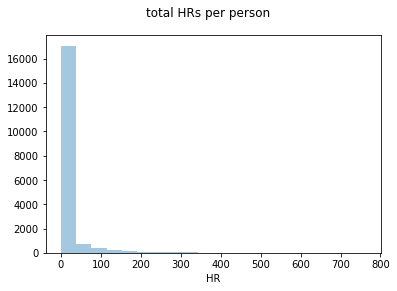

In [37]:
sns.distplot(bat_gp['HR'], bins=20, kde=False)
plt.suptitle('total HRs per person')